In [1]:
#the enivironment i am using grad

In [9]:
import os
import scipy.io

# Define the parent directory for the dataset
# parent_dir = r"C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\seed-IV\eeg_raw_data"
parent_dir="../datasets/CREMA-D/seed-IV/eeg_raw_data"
# Specify the session to process (e.g., session 1)
session = 1

# Construct the path to the session directory
session_path = os.path.join(parent_dir, str(session))

# Check if the session directory exists
if os.path.exists(session_path):
    # List all observations (files) in the session directory
    persons_list = os.listdir(session_path)
    print(f"Observations for session {session}: {persons_list}")
    
    # Process each .mat file in the session directory
    for person_file in persons_list:
        if person_file.endswith('.mat'):  # Check for .mat files
            file_path = os.path.join(session_path, person_file)
            print(f"Processing file: {file_path}")
            
            # Load the .mat file
            data = scipy.io.loadmat(file_path)
            
            # Print the keys in the .mat file to understand its structure
            print(f"Keys in {person_file}: {list(data.keys())}")
else:
    print(f"Session directory does not exist: {session_path}")


Observations for session 1: []


In [10]:
import os
import shutil

# Base directory for EEG raw data
base_dir = r"C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\seed-IV\eeg_raw_data"
target_base_dir = r"C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\SEED-IV"

# Session mapping
session_mapping = {
    1: "session1",
    2: "session2",
    3: "session3"
}

# Move files to session folders
for session, folder_name in session_mapping.items():
    session_dir = os.path.join(target_base_dir, folder_name)
    os.makedirs(session_dir, exist_ok=True)  # Create folder if not exists

    session_source_dir = os.path.join(base_dir, str(session))
    if os.path.exists(session_source_dir):
        for file_name in os.listdir(session_source_dir):
            if file_name.endswith(".mat"):
                source_file = os.path.join(session_source_dir, file_name)
                target_file = os.path.join(session_dir, file_name)
                shutil.move(source_file, target_file)

print("Files organized into session folders.")


Files organized into session folders.


In [11]:
import os
import scipy.io
import numpy as np

# Base directory for organized sessions
base_dir = r"C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\SEED-IV"
sessions = ["session1", "session2", "session3"]

# Initialize lists for data
eeg_shapes = []
eeg_ranges = []

# Process each session
for session in sessions:
    session_dir = os.path.join(base_dir, session)
    if not os.path.exists(session_dir):
        print(f"Session directory not found: {session_dir}")
        continue

    for mat_file in os.listdir(session_dir):
        if mat_file.endswith(".mat"):
            file_path = os.path.join(session_dir, mat_file)
            data = scipy.io.loadmat(file_path)

            # Extract EEG data from keys
            eeg_data = []
            for key in data.keys():
                if key.endswith("_eeg1") or key.endswith("_eeg24"):  # Adjust this logic based on keys
                    eeg_data.append(data[key].flatten())

            # Align and preprocess data
            if len(eeg_data) > 0:
                max_length = max(len(ch) for ch in eeg_data)
                eeg_data_aligned = [
                    np.pad(ch, (0, max_length - len(ch)), 'constant') if len(ch) < max_length else ch[:max_length]
                    for ch in eeg_data
                ]

                eeg_data_aligned = np.stack(eeg_data_aligned, axis=0)
                eeg_shapes.append(eeg_data_aligned.shape)
                eeg_ranges.append((np.min(eeg_data_aligned), np.max(eeg_data_aligned)))

# Output shapes and ranges for debugging
print("EEG Data Shapes:", eeg_shapes)
print("EEG Data Ranges:", eeg_ranges)


EEG Data Shapes: [(2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2083262), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2740462), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062), (2, 2108062)]
EEG Data Ranges: [(-120.7590103149414, 206.53009414672852), (-395.65563201904297, 310.68921089172363), (-818.0737495422363, 1427.1736145019531), (-364.1247749328613, 585.1686000823975), (-157.89270401000977, 182.12199211120605), (-327.70633697509766, 338.4053707122803), (-6891.906261444092, 2664.20841217041), (-575.3040313720703, 344.0678119659424), 

In [20]:
!pip install matplotlib

  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp39-cp39-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.8 MB 3.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 3.9 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 3.9 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fer 22.5.1 requires keras>=2.0.0, which is not installed.
fer 22.5.1 requires pandas, which is not installed.
fer 22.5.1 requires requests, which is not installed.
fer 22.5.1 requires tqdm>=4.62.1, which is not installed.


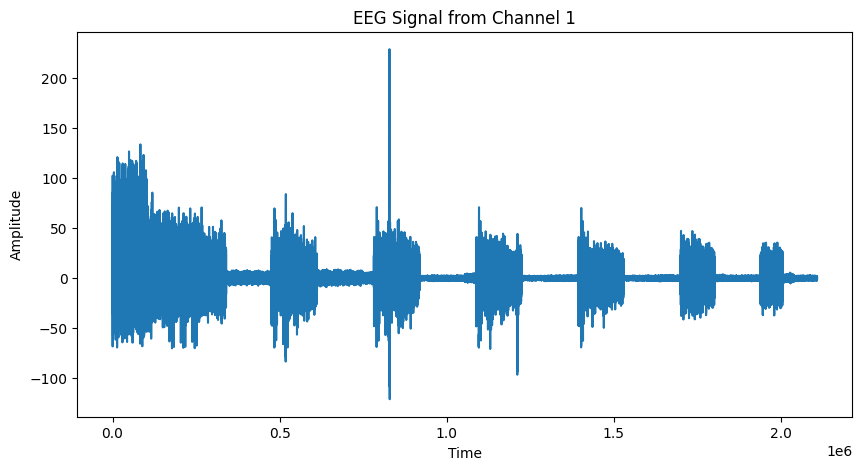

In [12]:
import matplotlib.pyplot as plt

# Example plot for EEG data from a single session
eeg_sample = eeg_data_aligned[0]  # Take the first channel from aligned data
plt.figure(figsize=(10, 5))
plt.plot(eeg_sample)
plt.title("EEG Signal from Channel 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [27]:
!pip install numpy==1.24.4


   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
    --------------------------------------- 0.3/14.9 MB ? eta -:--:--
   --- ------------------------------------ 1.3/14.9 MB 3.7 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/14.9 MB 3.8 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/14.9 MB 3.9 MB/s eta 0:00:04
   --------- ------------------------------ 3.7/14.9 MB 3.9 MB/s eta 0:00:03
   --------- ------------------------------ 3.7/14.9 MB 3.9 MB/s eta 0:00:03
   ------------ --------------------------- 4.7/14.9 MB 3.4 MB/s eta 0:00:03
   -------------- ------------------------- 5.5/14.9 MB 3.4 MB/s eta 0:00:03
   ------------------- -------------------- 7.1/14.9 MB 3.8 MB/s eta 0:00:03
   --------------------- ------------------ 7.9/14.9 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 8.7/14.9 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 9.4/14.9 MB 3.9 MB/s eta 0:00:02
   ----------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.0.0 requires PyYAML, which is not installed.
facenet-pytorch 2.5.2 requires requests, which is not installed.
facenet-pytorch 2.5.2 requires torchvision, which is not installed.
fer 22.5.1 requires keras>=2.0.0, which is not installed.
fer 22.5.1 requires pandas, which is not installed.
fer 22.5.1 requires requests, which is not installed.
fer 22.5.1 requires tqdm>=4.62.1, which is not installed.
moviepy 1.0.3 requires requests<3.0,>=2.8.1, which is not installed.
moviepy 1.0.3 requires tqdm<5.0,>=4.11.2, which is not installed.
scikit-image 0.19.3 requires networkx>=2.2, which is not installed.
scikit-image 0.19.3 requires PyWavelets>=1.1.1, which is not installed.
scikit-image 0.19.3 requires tifffile>=2019.7.26, which is 

In [1]:
import numpy
import sklearn

print(f"NumPy version: {numpy.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")


NumPy version: 1.26.4
Scikit-learn version: 1.5.2


In [14]:
from sklearn.metrics import mutual_info_score
import numpy as np

def mi_matrix(X, N):
    """
    Compute the mutual information matrix for EEG signals.
    
    Parameters:
    X (array-like): EEG data with shape (channels, samples).
    N (int): Number of EEG channels.

    Returns:
    np.ndarray: Mutual information matrix of shape (N, N).
    """
    mat = np.zeros((N, N), dtype=float)
    for i in range(N):
        for j in range(i, N):  # Mutual information matrix is symmetric
            mat[i][j] = mutual_info_score(X[i].ravel(), X[j].ravel())
            mat[j][i] = mat[i][j]
    return mat


In [7]:
def wasserstein_scalar_curvature(mi_matrix):
    """
    Calculate the Wasserstein scalar curvature for the MI matrix.

    Parameters:
    mi_matrix (np.ndarray): Mutual information matrix.

    Returns:
    float: Wasserstein scalar curvature.
    """
    lambdas = np.linalg.eigvals(mi_matrix)
    if np.any(lambdas <= 0):
        return 0  # Avoid issues with negative eigenvalues

    n = len(lambdas)
    curvature = sum([1 / (lambdas[i] + lambdas[j]) for i in range(n) for j in range(n)])
    return curvature


In [19]:
def extract_label_from_filename(filename):
    """
    Extracts the label from the filename based on a predefined mapping.

    Parameters:
    filename (str): Name of the .mat file.

    Returns:
    int: Corresponding label ID.
    """
    label_mapping = {
        "happy": 0,
        "sad": 1,
        "fear": 2,
        "neutral": 3
    }
    for label, label_id in label_mapping.items():
        if label in filename.lower():
            return label_id
    raise ValueError(f"Label not found in filename: {filename}")


In [ ]:
#####trying to see a problem 